# Notebook KNN6: Autoencoder

Ein Autoencoder ist ein KNN, bei dem die Anzahl der Input- und Output-Neuronen identisch sind und welches die Identität lernen soll. Sind also x_train, y_train die Trainingsdaten, so gilt y_train = x_train.

Ein solches Netz kann versuchen, eine Darstellung der Daten in einem niederdimensionalen Parameterraum zu lernen, z.B. indem eine Datenmenge im R^3 auf eine Ebene/Gerade projiziert wird. 


Siehe auch 'Dimensionsreduktion', 'Hauptkomponentenanalyse'.


Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


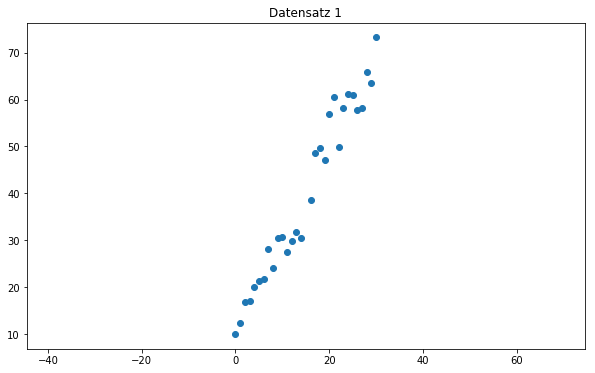

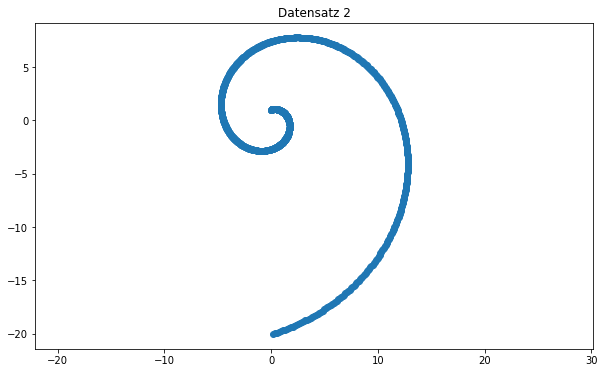

In [0]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
from random import randint

  
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

x_Werte = [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30.]
y_Werte = [10.01658801, 12.44031689, 16.74158448, 16.99873647, 19.9301948 ,
       21.3662462 , 21.81029917, 28.12350724, 23.99691104, 30.37132938,
       30.7411985 , 27.51173669, 29.86051921, 31.83605475, 30.53806554,
       38.67317334, 48.65172013, 49.65403085, 47.05943994,
       56.90034954, 60.5995608 , 49.83008854, 58.24880042, 61.19101233,
       61.06640885, 57.78297408, 58.12449899, 65.83760744, 63.55813398,
       73.22576714]

x_train = []
for j in range(30):
  x_train.append([x_Werte[j], y_Werte[j]])
x_train = np.array(x_train)
plt.title('Datensatz 1')
plt.axis('equal') 
plt.scatter(x_train[:,0], x_train[:,1])
plt.show()  
  
x_Werte=[]
y_Werte=[]

number_points = 1000
for j in range(number_points):
  x_Werte.append(np.sin(3*j/number_points*np.pi)*np.exp(j/number_points*3))
  y_Werte.append(np.cos(3*j/number_points*np.pi)*np.exp(j/number_points*3))


x_train2 = []
for j in range(number_points):
  x_train2.append([x_Werte[j], y_Werte[j]])
  
x_train2 = np.array(x_train2)

plt.title('Datensatz 2')
plt.axis('equal') 
plt.scatter(x_train2[:,0], x_train2[:,1])
plt.show()



# Datensatz 1

Wir konstruieren ein KNN mit zwei Input-Neuronen, einer versteckten Schicht mit einem Neuron und zwei Output-Neuronen. Zudem verwenden wir nur lineare Aktivierungsfunktionen und die Fehler-Funktion MSE. Das KNN lernt eine Gerade durch die Punktmenge entlang der größten Streuung zu legen (siehe 'Hauptkomponentenanalyse').

Dies liefert eine eindimensionale Darstellung der zweidimensionalen Datenmenge (siehe 'Dimensionsreduktion').



W0627 13:02:53.614329 140567778461568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0627 13:02:53.623011 140567778461568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0627 13:02:53.629585 140567778461568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0627 13:02:53.668289 140567778461568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0627 13:02:53.781241 140567778461568 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


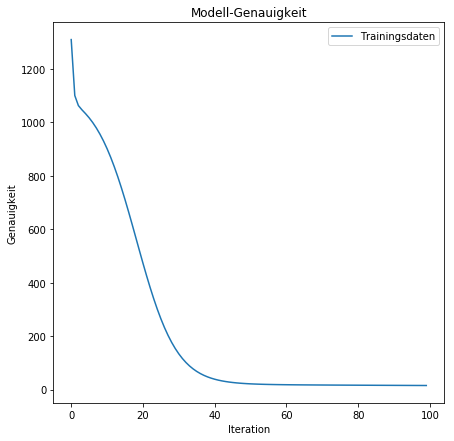

Fehler bei den Testdaten: 15.1
Genauigkeit bei den Testdaten: 15.1


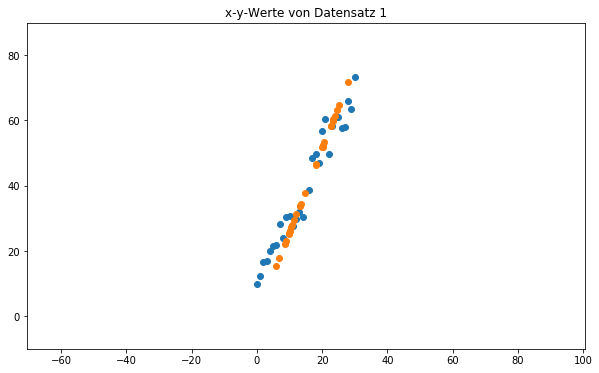

In [0]:
# Modell definieren
#tf.reset_default_graph()
model1 = Sequential()

model1.add(Dense(units=1, activation='linear', use_bias=False, input_shape=(2,)))
model1.add(Dense(units=2, activation='linear', use_bias=False))
model1.summary()

# Modell trainieren

Lernrate = 0.0001
batch_size = 30
Anzahl_Iterationen = 100
model1.compile(optimizer=keras.optimizers.SGD(lr=Lernrate), loss='mean_squared_error', metrics=['mean_squared_error'])
# verbose=0: kein Output des Lernfortschritts, verbose=1: Output des Lernfortschritts
history = model1.fit(x=x_train, y=x_train, batch_size=batch_size, epochs=Anzahl_Iterationen, verbose=0)

# Ergbnis graphisch darstellen
plt.figure(figsize=(7,7))
plt.plot(history.history['mean_squared_error'])
plt.title('Modell-Genauigkeit')
plt.ylabel('Genauigkeit')
plt.xlabel('Iteration')
plt.legend(['Trainingsdaten'], loc='best')
plt.show()

loss, accuracy  = model1.evaluate(x_train, x_train, verbose=False)
print(f'Fehler bei den Testdaten: {loss:.3}')
print(f'Genauigkeit bei den Testdaten: {accuracy:.3}')


plt.title('x-y-Werte von Datensatz 1')
plt.axis('equal') 
plt.ylim((-10,90))
plt.xlim((-10,40))
plt.scatter(x_train[:,0], x_train[:,1])

Vorhersage = model1.predict(x_train)
plt.scatter(Vorhersage[:,0], Vorhersage[:,1])
plt.show()

# Datensatz 2


Wenden wir zunächst dasselbe KNN auf Datensatz 2 an:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


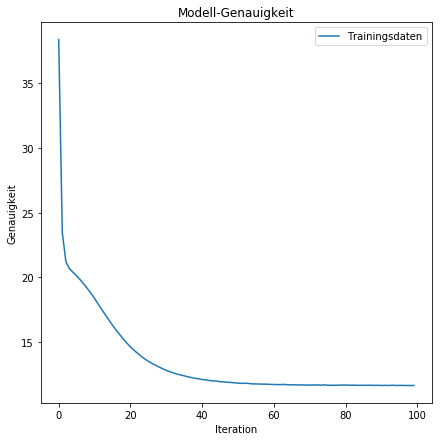

Fehler bei den Testdaten: 11.6
Genauigkeit bei den Testdaten: 11.6


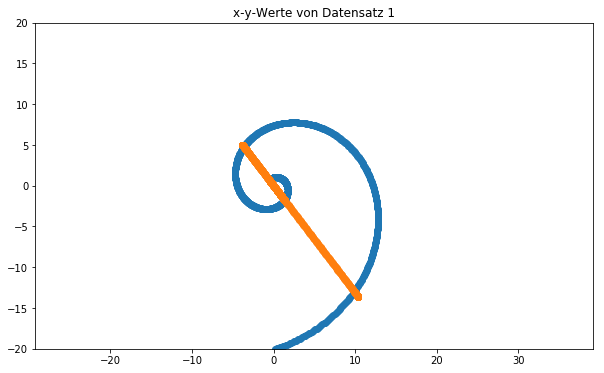

In [0]:
# Modell definieren
#tf.reset_default_graph()
model1 = Sequential()

model1.add(Dense(units=1, activation='linear', use_bias=False, input_shape=(2,)))
model1.add(Dense(units=2, activation='linear', use_bias=False))
model1.summary()

# Modell trainieren

Lernrate = 0.001
batch_size = 100
Anzahl_Iterationen = 100
model1.compile(optimizer=keras.optimizers.SGD(lr=Lernrate), loss='mean_squared_error', metrics=['mean_squared_error'])
# verbose=0: kein Output des Lernfortschritts, verbose=1: Output des Lernfortschritts
history = model1.fit(x=x_train2, y=x_train2, batch_size=batch_size, epochs=Anzahl_Iterationen, verbose=0)

# Ergbnis graphisch darstellen
plt.figure(figsize=(7,7))
plt.plot(history.history['mean_squared_error'])
plt.title('Modell-Genauigkeit')
plt.ylabel('Genauigkeit')
plt.xlabel('Iteration')
plt.legend(['Trainingsdaten'], loc='best')
plt.show()

loss, accuracy  = model1.evaluate(x_train2, x_train2, verbose=False)
print(f'Fehler bei den Testdaten: {loss:.3}')
print(f'Genauigkeit bei den Testdaten: {accuracy:.3}')


plt.title('x-y-Werte von Datensatz 1')
plt.axis('equal') 
plt.scatter(x_train2[:,0], x_train2[:,1])
plt.ylim((-20,20))
plt.xlim((-10,20))
Vorhersage = model1.predict(x_train2)
plt.scatter(Vorhersage[:,0], Vorhersage[:,1])
plt.show()

Datensatz 2 liegt exakt auf einer Spirale (eine eindimensionale Untermannigfaltigkeit) und lässt sich somit auch durch einen eindimensionalen Parameter darstellen. Wir fügen nun zur verstcketen Schicht weitere Neuronen hinzu und verwenden eine nicht-lineare Aktivierungsfunktion. 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 13)                26        
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 26        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


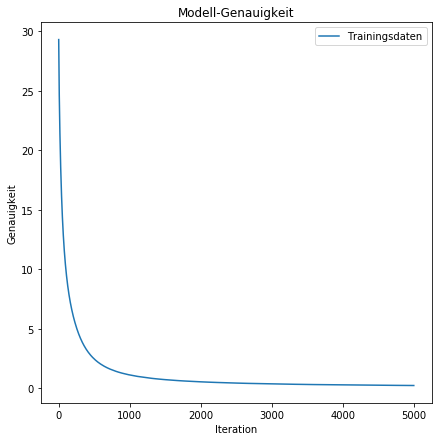

Fehler bei den Testdaten: 0.25
Genauigkeit bei den Testdaten: 0.25


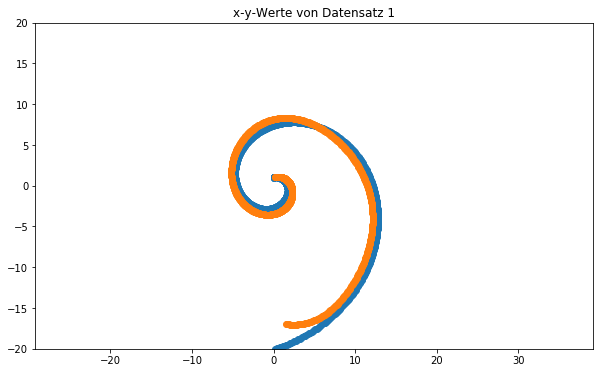

In [0]:
# Modell definieren
#tf.reset_default_graph()
model1 = Sequential()

model1.add(Dense(units=13, activation='sigmoid', use_bias=False, input_shape=(2,)))
model1.add(Dense(units=2, activation='linear', use_bias=False))
model1.summary()

# Modell trainieren

Lernrate = 0.001
batch_size = 100
Anzahl_Iterationen = 5000
model1.compile(optimizer=keras.optimizers.SGD(lr=Lernrate), loss='mean_squared_error', metrics=['mean_squared_error'])
# verbose=0: kein Output des Lernfortschritts, verbose=1: Output des Lernfortschritts
history = model1.fit(x=x_train2, y=x_train2, batch_size=batch_size, epochs=Anzahl_Iterationen, verbose=0)

# Ergbnis graphisch darstellen
plt.figure(figsize=(7,7))
plt.plot(history.history['mean_squared_error'])
plt.title('Modell-Genauigkeit')
plt.ylabel('Genauigkeit')
plt.xlabel('Iteration')
plt.legend(['Trainingsdaten'], loc='best')
plt.show()

loss, accuracy  = model1.evaluate(x_train2, x_train2, verbose=False)
print(f'Fehler bei den Testdaten: {loss:.3}')
print(f'Genauigkeit bei den Testdaten: {accuracy:.3}')


plt.title('x-y-Werte von Datensatz 1')
plt.axis('equal') 
plt.scatter(x_train2[:,0], x_train2[:,1])
plt.ylim((-20,20))
plt.xlim((-10,20))
Vorhersage = model1.predict(x_train2)
plt.scatter(Vorhersage[:,0], Vorhersage[:,1])
plt.show()

# Eine ähnliche Implementierung des KNN von Datensatz 1 (mit low-level TensorFlow statt Keras), bei dem Gewichte geteilt werden.

loss = 2.265264
[[0.3885108 ]
 [0.92144406]]
[[-1.155607    0.36452565]]


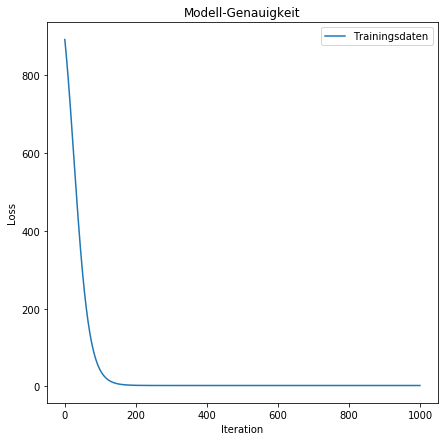

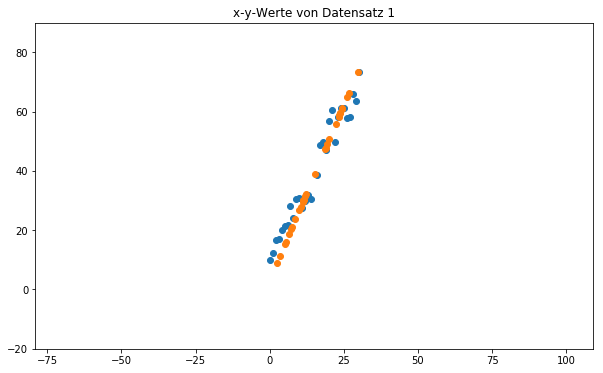

In [0]:
tf.reset_default_graph() 
x = tf.placeholder(tf.float32, shape=(None,2), name='x') # Input-Variable x

y = tf.placeholder(tf.float32, shape=(None,2), name='y') # Output-Variable y

a = tf.Variable(tf.random.normal(shape = [2,1]), name='a')
b = tf.Variable(tf.random.normal(shape = [1,2]), name='b')

with tf.variable_scope('Output') as scope:
    y_hidden = tf.matmul(x-b,a)  
    y_output = tf.matmul(y_hidden, tf.transpose(a))+b
    loss = tf.reduce_mean(tf.square(y_output - y))
   
    
Lernrate = 0.00001
optimizer = tf.train.GradientDescentOptimizer(learning_rate=Lernrate)
#optimizer = tf.train.AdamOptimizer(1e-3)

Anzahl_Iterationen = 1000
train_op = optimizer.minimize(loss)
loss_values = []
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    feed_dict = {x: x_train, y: x_train}
    for i in range(Anzahl_Iterationen):
         _, loss_value = session.run([train_op, loss], feed_dict)
         loss_values.append(loss_value)
   
    Vorhersage = session.run(y_output, {x : x_train})
    print("loss = " + str(loss_value))
    a_value = session.run(a)
    b_value = session.run(b)
    print(a_value)
    print(b_value)

    
loss_values = np.array(loss_values)    
plt.figure(figsize=(7,7))
plt.plot(loss_values)
plt.title('Modell-Genauigkeit')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend(['Trainingsdaten'], loc='best')
plt.show()

plt.title('x-y-Werte von Datensatz 1')
plt.axis('equal') 
plt.ylim((-20,90))
plt.xlim((-10,40))
plt.scatter(x_train[:,0], x_train[:,1])
plt.scatter(Vorhersage[:,0], Vorhersage[:,1])
plt.show()